In [1]:
#for accessing directories and data manipulation
import os
import random
from pathlib import Path
import numpy as np
import pandas as pd
import cv2

In [2]:
## for accessing images or visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageStat


### Class distribution

In [3]:
train_folder_path = 'C:\\Users\\manis\\OneDrive\\Desktop\\Data Science Plan\\Major Project\\balanced_ds'
class_count ={}
for class_name in os.listdir(train_folder_path): # access sub-folder name
    class_path = os.path.join(train_folder_path, class_name) # access images in sub-folder
    
    if(os.path.isdir(class_path)):
        
        num_images = len([img for img in os.listdir(class_path)]) # storing image count for each class
        
        class_count[class_name] = num_images
   

In [8]:
Total_images =0
for key, value in class_count.items():
    Total_images = Total_images +value
    print(key,' : ', value)

print('Total Number of images : ',Total_images )

Bacterial Spot  :  2127
Early Blight  :  2400
Healthy  :  2401
Late Blight  :  2304
Septoria Leaf Spot  :  2181
Yellow Leaf Curl Virus  :  2451
Total Number of images :  13864


In [9]:
#Converting dictionary to dataframe for visualization

class_df = pd.DataFrame.from_dict(class_count.items())
class_df.columns=['class_name','images']

In [10]:
class_df.sort_values(by='images', ascending=False)

,class_name,images
5,Yellow Leaf Curl Virus,2451
2,Healthy,2401
1,Early Blight,2400
3,Late Blight,2304
4,Septoria Leaf Spot,2181
0,Bacterial Spot,2127


### Visualize Class Distribution

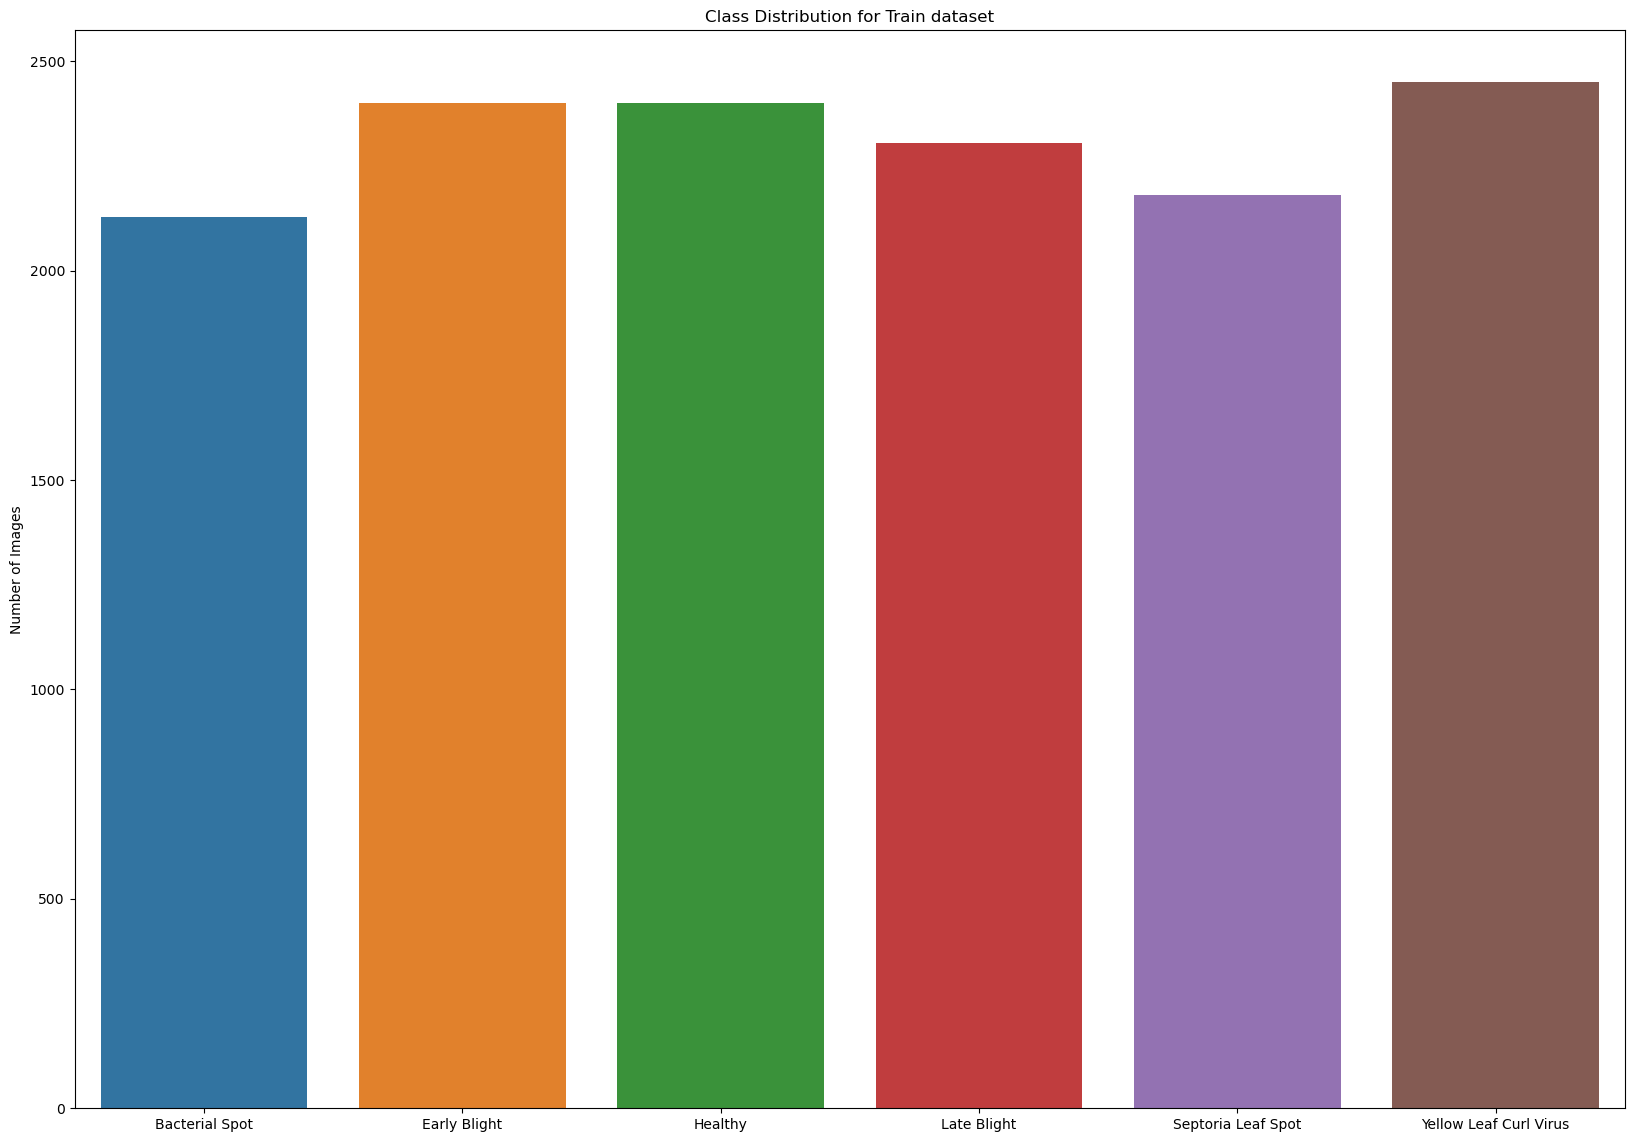

In [11]:
plt.figure(figsize=(20, 14))
sns.barplot(x='class_name', y='images', data=class_df)
plt.title('Class Distribution for Train dataset')
plt.xlabel('')
plt.ylabel('Number of Images')
plt.show()

#### The size of all the images are 256 x 256

## The RGB channel distibution in the dataset

## To accurately analyse the distribution of RGB channel in each class, we will balance the dataset. Each class should contain 1700 images

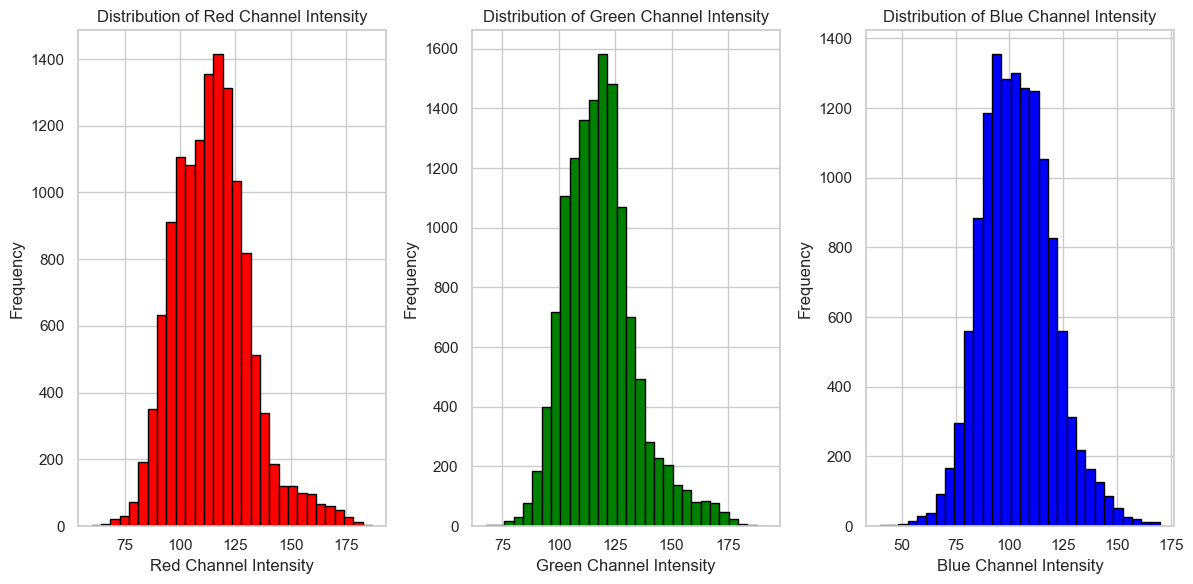

In [34]:

reds = []
greens = []
blues = []
rbg= []
train_folder_path = 'C:\\Users\\manis\\OneDrive\\Desktop\\Data Science Plan\\Major Project\\balanced_ds'

for class_name in os.listdir(train_folder_path): # access sub-folder in train set
    class_path = os.path.join(train_folder_path, class_name) # access images in sub-folder
    
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            if img_name.endswith(('.JPG')): #open images in sub-folder
                img_path = os.path.join(class_path, img_name)
                
                
                with Image.open(img_path) as img:
                    img_rgb = img.convert('RGB') # convert images to RGB
                    np_img = np.array(img_rgb) # convert the image into numpy array
                    
                    
                    reds.append(np_img[:, :, 0].mean()) #append the mean of red channel for each image
                    greens.append(np_img[:, :, 1].mean()) # append the mean of green channnel for each image
                    blues.append(np_img[:, :, 2].mean())# append the mean of blue channel for each image 
                    
        #print(f"RGB Distribution for {class_name}")
        #print(f'Red: {np.array(reds).mean()}, Green: {np.array(greens).mean()}, Blue: {np.array(blues).mean()}')
        rbg.append({"Leaf Category": class_name, "Red": np.array(reds).mean(),"Green": np.array(greens).mean(),
        "Blue":np.array(blues).mean()}) # appending the mean of all images for each class
        
rbg_dist = pd.DataFrame(rbg)
#Plotting RGB channel distribution        

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(reds, bins=30, color='red', edgecolor='black')
plt.xlabel('Red Channel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Red Channel Intensity')

plt.subplot(1, 3, 2)
plt.hist(greens, bins=30, color='green', edgecolor='black')
plt.xlabel('Green Channel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Green Channel Intensity')

plt.subplot(1, 3, 3)
plt.hist(blues, bins=30, color='blue', edgecolor='black')
plt.xlabel('Blue Channel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Blue Channel Intensity')

plt.tight_layout()
plt.show()

In [35]:
pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [36]:
rbg_dist = pd.DataFrame(rbg)

In [37]:
rbg_dist

,Leaf Category,Red,Green,Blue
0,Bacterial Spot,101.97,108.67,93.27
1,Early Blight,105.79,110.89,97.48
2,Healthy,107.90,112.86,100.96
3,Late Blight,111.17,115.03,103.08
4,Septoria Leaf Spot,115.13,118.60,106.30
5,Yellow Leaf Curl Virus,114.52,118.55,103.63


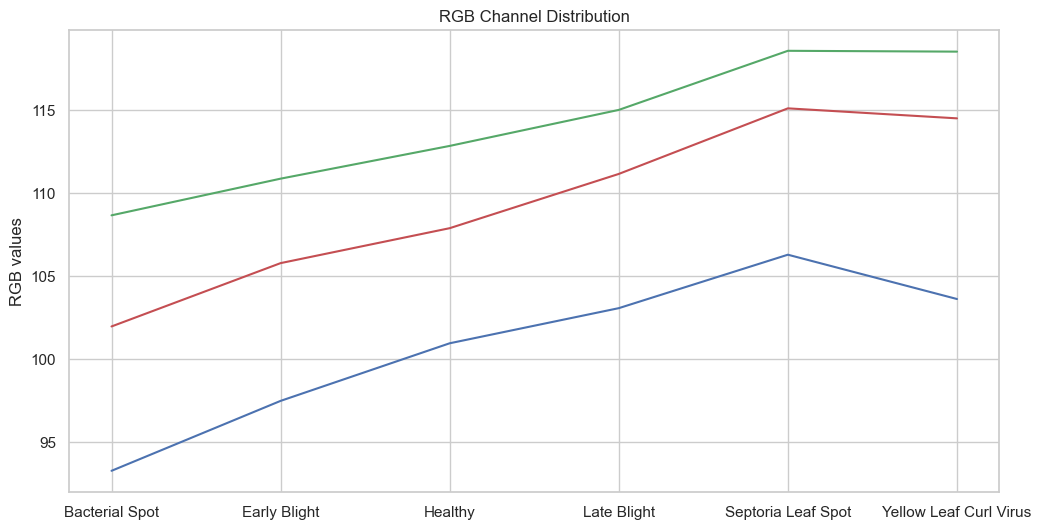

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=rbg_dist, x="Leaf Category", y='Red', color='r')
sns.lineplot(data=rbg_dist, x="Leaf Category", y='Green', color='g')
sns.lineplot(data=rbg_dist, x="Leaf Category", y='Blue', color='b')
plt.xlabel('')
plt.ylabel('RGB values')
plt.title('RGB Channel Distribution')
plt.show()

### No need for resizing 

### The colors red and green are sightly more prominent in the leaves , if these was any disease then it would be indicated by yellowing or browing

1. Red Channel Distribution
The distribution is centered around 100-125, with a few images showing higher values.
This means most pixels in your dataset have moderate red intensity. Some outliers with higher intensities may represent specific image features or types of leaves with red hues.
2. Green Channel Distribution
The green channel histogram is also centered around 100-125, with fewer pixels in higher intensity ranges.
Green is often dominant in images of leaves, so it makes sense that the green channel is significant. This channel could be critical for identifying healthy or diseased areas since green intensity might decrease in diseased regions.
3. Blue Channel Distribution
The blue channel has a similar shape but peaks lower than the other channels, with the majority of pixels in the 75-100 range.
This suggests that blue is generally less prominent in your dataset, which is common for images of natural objects like leaves.
Summary of Insights
Color Distribution Patterns: Most images in your dataset are dominated by green and red channels, with lower blue values.
Disease Indications: Changes in color intensity across channels (especially green and red) could indicate disease symptoms (e.g., yellowing, browning).
Model Implications: These channel distributions can guide preprocessing decisions (e.g., normalization) and indicate that color may be a helpful feature for disease classification.

### color difference for individual classes

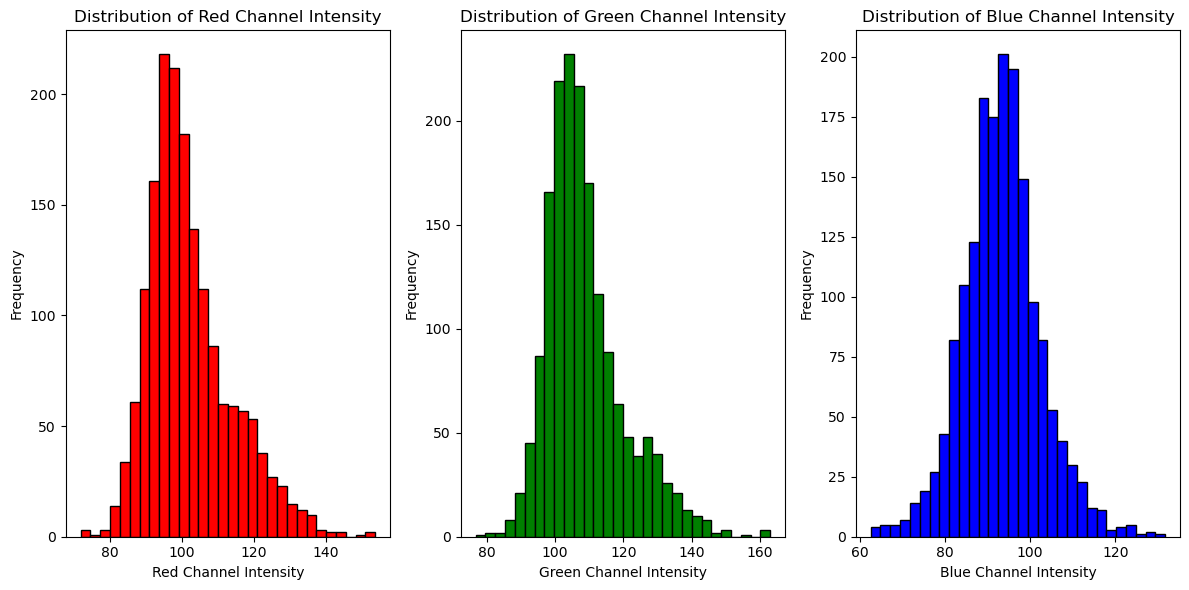

In [34]:
reds = []
greens = []
blues = []
class_path = 'C:\\Users\\manis\\OneDrive\\Desktop\\Data Science Plan\\Major Project\\Tomato_Dataset\\Train\\Bacterial Spot'
for img_name in os.listdir(class_path):
    if img_name.endswith(('.JPG')):
        img_path = os.path.join(class_path, img_name)
        with Image.open(img_path) as img:
            img_rgb = img.convert('RGB')
            np_img = np.array(img_rgb)
            red_mean = np_img[:, :, 0].mean()
            green_mean = np_img[:, :, 1].mean()
            blue_mean = np_img[:, :, 2].mean()
            
            # Append to overall lists
            reds.append(red_mean)
            greens.append(green_mean)
            blues.append(blue_mean)
            
            #rgb_values[img_name] = (red_mean, green_mean, blue_mean)


#for img_name, rgb in rgb_values.items():
    #print(f"{img_name}: R={rgb[0]}, G={rgb[1]}, B={rgb[2]}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(reds, bins=30, color='red', edgecolor='black')
plt.xlabel('Red Channel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Red Channel Intensity')

plt.subplot(1, 3, 2)
plt.hist(greens, bins=30, color='green', edgecolor='black')
plt.xlabel('Green Channel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Green Channel Intensity')

plt.subplot(1, 3, 3)
plt.hist(blues, bins=30, color='blue', edgecolor='black')
plt.xlabel('Blue Channel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Blue Channel Intensity')

plt.tight_layout()
plt.show()

In [37]:
print(f"RGB Distribution for {class_name} Leaves")
print('Red Channel: ',np.array(reds).mean())
print('Green Channel: ',np.array(greens).mean())
print('Blue Channel: ',np.array(blues).mean())

RGB Distribution for Yellow Leaf Curl Virus Leaves
Red Channel:  102.0400809300352
Green Channel:  108.72413429950575
Blue Channel:  93.30198809290884


### Measuring the sharpness, brightness and contrast

In [13]:
#measuring shaprness
def measure_sharpness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)#convert image to grayscale
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var() #using laplacian to calculate the sharpness
    return laplacian_var

In [14]:
#measuring brightness
def measure_brightness(image_path):
    image = Image.open(image_path).convert('L')# Convert to grayscale
    stat = ImageStat.Stat(image)
    brightness = stat.mean[0]
    return brightness

In [15]:
#measuring contrast
def measure_contrast(image_path):
    image = Image.open(image_path).convert('L')# Convert to grayscale
    stat = ImageStat.Stat(image)
    contrast = stat.stddev[0]
    return contrast

In [17]:
# Path to the dataset
dataset_path =  "C:\\Users\\manis\\OneDrive\\Desktop\\Data Science Plan\\Major Project\\balanced_ds"
results = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    # Check if it's a directory
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            if image_name.endswith(('.JPG')):
                image_path = os.path.join(class_path, image_name)
            
            # Calculate sharpness, brightness, and contrast
            sharpness = measure_sharpness(image_path)
            brightness = measure_brightness(image_path)
            contrast = measure_contrast(image_path)
            
            # Append results
            results.append({
                'class': class_name,
                'image_name': image_name,
                'sharpness': sharpness,
                'brightness': brightness,
                'contrast': contrast
            })
            
df = pd.DataFrame(results)

In [52]:
results

[{'class': 'Early Blight',
  'image_name': 'Early Blight_1.JPG',
  'sharpness': 1565.3572207444813,
  'brightness': 104.75309753417969,
  'contrast': 48.07246775689596},
 {'class': 'Early Blight',
  'image_name': 'Early Blight_10.JPG',
  'sharpness': 10733.491004451877,
  'brightness': 130.15431213378906,
  'contrast': 50.11742900513455},
 {'class': 'Early Blight',
  'image_name': 'Early Blight_100.JPG',
  'sharpness': 4081.1781947442796,
  'brightness': 130.34710693359375,
  'contrast': 58.01252348445518},
 {'class': 'Early Blight',
  'image_name': 'Early Blight_1000.JPG',
  'sharpness': 611.5327685019001,
  'brightness': 108.24752807617188,
  'contrast': 25.568204314979226},
 {'class': 'Early Blight',
  'image_name': 'Early Blight_1001.JPG',
  'sharpness': 713.5541768437251,
  'brightness': 107.56976318359375,
  'contrast': 40.22710891662016},
 {'class': 'Early Blight',
  'image_name': 'Early Blight_1002.JPG',
  'sharpness': 713.5514302616939,
  'brightness': 107.56976318359375,
  'c

In [18]:
df = pd.DataFrame(results)

In [19]:
df.groupby('class')['sharpness'].agg(['min','median','max'])

,min,median,max
class,,,
Bacterial Spot,56.67,981.37,4764.23
Early Blight,52.30,2079.44,13999.10
Healthy,100.14,14655.78,33517.25
Late Blight,28.52,2065.87,11047.36
Septoria Leaf Spot,135.70,4765.23,22865.40
Yellow Leaf Curl Virus,5.02,364.29,10751.29


In [20]:
df.groupby('class')['brightness'].agg(['min','median','max'])

,min,median,max
class,,,
Bacterial Spot,74.75,102.96,155.68
Early Blight,75.76,108.92,187.85
Healthy,64.13,116.72,251.06
Late Blight,67.37,119.75,178.94
Septoria Leaf Spot,83.66,128.52,186.67
Yellow Leaf Curl Virus,47.12,113.19,185.82


In [21]:
df.groupby('class')['contrast'].agg(['min','median','max'])

,min,median,max
class,,,
Bacterial Spot,15.64,33.61,57.32
Early Blight,22.60,46.47,73.32
Healthy,9.46,45.21,80.07
Late Blight,12.06,40.03,77.19
Septoria Leaf Spot,12.30,38.92,65.13
Yellow Leaf Curl Virus,12.59,34.28,66.19


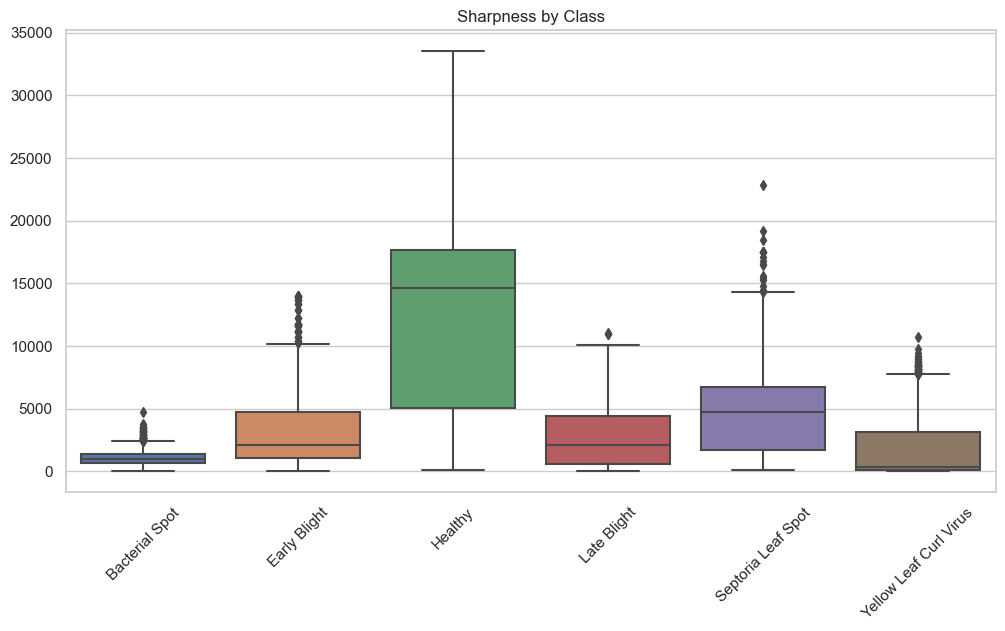

In [22]:
# Plot sharpness by class
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='sharpness')
plt.title('Sharpness by Class')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()

According to the box plot the healthy leaf class has the highest sharpness, the spread of the IQR is bigger, which means more variations of sharpness is there for healthy class. All the images are in the specific range since there are no outliers. the most blurred images/ image are in yellow leaf curl virus and bacterial spot. Bacterial spot having the least spread in sharpness of images . All the classes (except healthy class) have outlier in the higher end which means that there are a few images with higher sharpness than overall calculated ranges for each class. SO far healthy has the highest median and most variation, yellow leaf has the lowest median followed by bacterial spot with the lower median and least variation

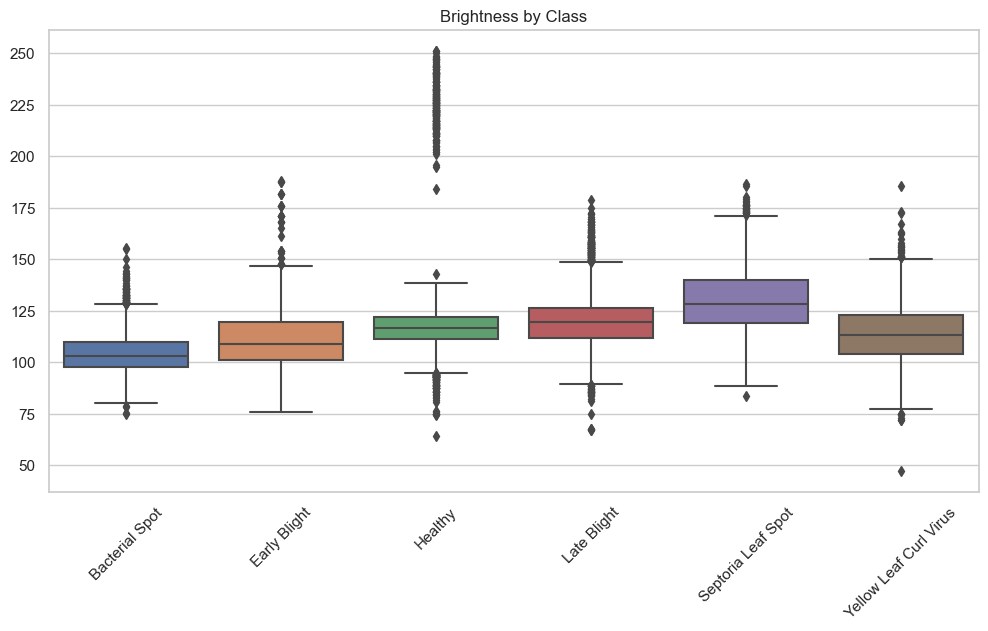

In [23]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='brightness')
plt.title('Brightness by Class')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()


From the above box plot the septoria leaf spot has the higher median value compared to other classes.
The healthy leaf class has the smallest variation given the IQR range is narrow compared to septoria and late blight
There are more number of outliers in the upper range for healthy leaves and more number of outliers for late blight in the lower range
Although healthy class looks normal because the median is in the middle of the box
late blight might be negaive skew since the median is a little towards the upper quartile(longer upper wisker also means negative skew). So far we can say that healthy seems to have the least variation but more outliers, septoria leaf spot with higher brightness and bacterial spot with the lowest brightness score. LAte blight having darker images

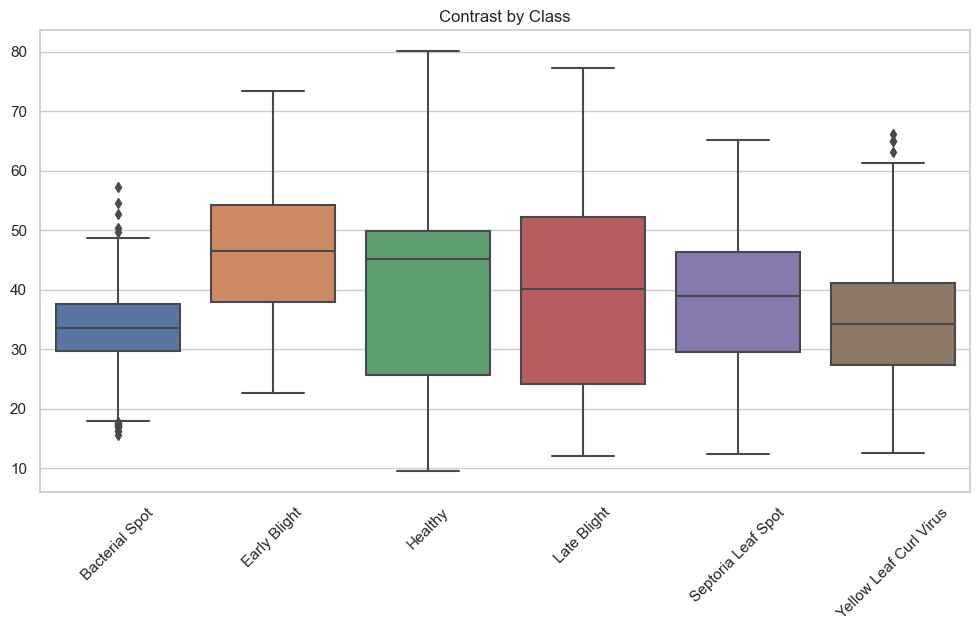

In [25]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='contrast')
plt.title('Contrast by Class')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()

The plot has different spread of data for each class. given the size of the IQR, late blight has the most variation folowed by healthy
Early blight has the highest median compared to others, it also seems to have a normal distribution followed by bacterial spot, septoria leaf and yellow leaf curl virus
healthy has a negative skew given the median is to the upper quartile with longer wisker on the upper side.
In summary, contrast appears to be a distinguishing factor, especially between Bacterial Spot and Early Blight. However, some classes show substantial overlap, which may present challenges 


why are we doing RGB chaneling, sharpness, brightness and contrast measures?

To see if these measurements will be able to distinguish evidently between different classes. But so far ther is an overlap with different class except for 2 or 3

### Note - Box plot do not tell how many data points are there in the class, it just tells you the proportion

In [26]:
df['class'].value_counts()

class
Yellow Leaf Curl Virus    2451
Healthy                   2401
Early Blight              2400
Late Blight               2304
Septoria Leaf Spot        2181
Bacterial Spot            2127
Name: count, dtype: int64

In [27]:
sharpness_threshold = 60
brightness_threshold_low = 50
brightness_threshold_high = 185

df['flag_blurry'] = df['sharpness'] < sharpness_threshold
df['flag_bright'] = df['brightness'] > brightness_threshold_high
df['flag_dark'] = df['brightness'] < brightness_threshold_low

flagged_images = df[(df['flag_blurry']) | (df['flag_bright']) | (df['flag_dark'])]
print(flagged_images)

                        class  \
1395           Bacterial Spot   
2259             Early Blight   
2535             Early Blight   
2536             Early Blight   
2537             Early Blight   
...                       ...   
13794  Yellow Leaf Curl Virus   
13810  Yellow Leaf Curl Virus   
13819  Yellow Leaf Curl Virus   
13847  Yellow Leaf Curl Virus   
13857  Yellow Leaf Curl Virus   

                                              image_name  sharpness  \
1395   a9b91a6d-80e7-4234-9a0f-6298ba147a84___GCREC_B...      56.67   
2259   15fb19ad-8a5a-4e1b-8ed2-c8d48b006b1d___RS_Erly...      58.78   
2535   352ced01-4645-44e5-bc3e-1b7172deb883___RS_Erly...   10113.08   
2536   352ced01-4645-44e5-bc3e-1b7172deb883___RS_Erly...   10135.06   
2537   352ced01-4645-44e5-bc3e-1b7172deb883___RS_Erly...   10135.08   
...                                                  ...        ...   
13794  fcdfc17c-1a1b-48df-8612-740f3a50fcbd___UF.GRC_...      52.60   
13810  fdce3f3b-0eac-42d8-9e54-1b75

### Storing the images in csv file which are too bright , too dark or blurry 

In [28]:

flagged_images[flagged_images['flag_bright']==True].to_csv('bright_imgs.csv', index =False)

In [29]:

flagged_images[flagged_images['flag_dark']==True].to_csv('dull_imgs.csv', index =False)

In [30]:

flagged_images[flagged_images['flag_blurry']==True].to_csv('blurry_imgs.csv', index =False)

In [31]:
df[df['flag_blurry']].sort_values(by='sharpness')

,class,image_name,sharpness,brightness,contrast,flag_blurry,flag_bright,flag_dark
12808,Yellow Leaf Curl Virus,cd37cbce-e141-40a5-8af6-8fa6790c7ed3___UF.GRC_...,5.02,112.30,17.53,True,False,False
12007,Yellow Leaf Curl Virus,a5b5d284-5081-4340-9cfa-be58ed74aea3___UF.GRC_...,5.23,122.51,17.52,True,False,False
12488,Yellow Leaf Curl Virus,bdb46bf4-d226-4cd1-be9d-4ca36623fd5f___UF.GRC_...,7.89,119.14,22.64,True,False,False
12665,Yellow Leaf Curl Virus,c6380761-954b-4a14-b686-05ce51868611___UF.GRC_...,9.25,132.97,18.37,True,False,False
12575,Yellow Leaf Curl Virus,c1608c9f-8ae7-444b-afa5-bc50051e2d1a___UF.GRC_...,9.89,133.80,16.22,True,False,False
...,...,...,...,...,...,...,...,...
12123,Yellow Leaf Curl Virus,ab323376-9f62-4454-b478-7de2bb02ab59___UF.GRC_...,59.65,113.16,23.90,True,False,False
13426,Yellow Leaf Curl Virus,eb613923-0d8d-4ebd-914b-fa52188c0630___UF.GRC_...,59.67,127.38,30.62,True,False,False
12679,Yellow Leaf Curl Virus,c7248000-66d1-4be5-8db9-f29d3959e3c5___UF.GRC_...,59.82,100.55,29.31,True,False,False
12614,Yellow Leaf Curl Virus,c3cdca74-eaa0-4fac-b0ea-41006fd2b3b0___UF.GRC_...,59.88,125.16,20.66,True,False,False


### Plotting histogram Pixiel Intensities

In [39]:
training_folder = 'C:\\Users\\manis\\OneDrive\\Desktop\\Data Science Plan\\Major Project\\balanced_ds'

In [40]:
def plot_intensity_histograms(training_folder):
    class_histograms = {}

    for disease_class in os.listdir(training_folder):
        class_folder = os.path.join(training_folder, disease_class)
        if not os.path.isdir(class_folder):
            continue
        
        all_histograms = []
        
        # Iterate over each image in the disease class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # convert rgb to grayscale
            
            # Calculate the histogram of pixel intensities
            histogram, _ = np.histogram(image, bins=256, range=(0, 255))
            all_histograms.append(histogram)
        
        # Average histogram for the class
        avg_histogram = np.mean(all_histograms, axis=0)
        class_histograms[disease_class] = avg_histogram

    # Plotting histograms for each class
    plt.figure(figsize=(12, 8))
    for disease_class, histogram in class_histograms.items():
        plt.plot(histogram, label=disease_class)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Average Pixel Intensity Histogram per Disease Class')
    plt.legend()
    plt.show()


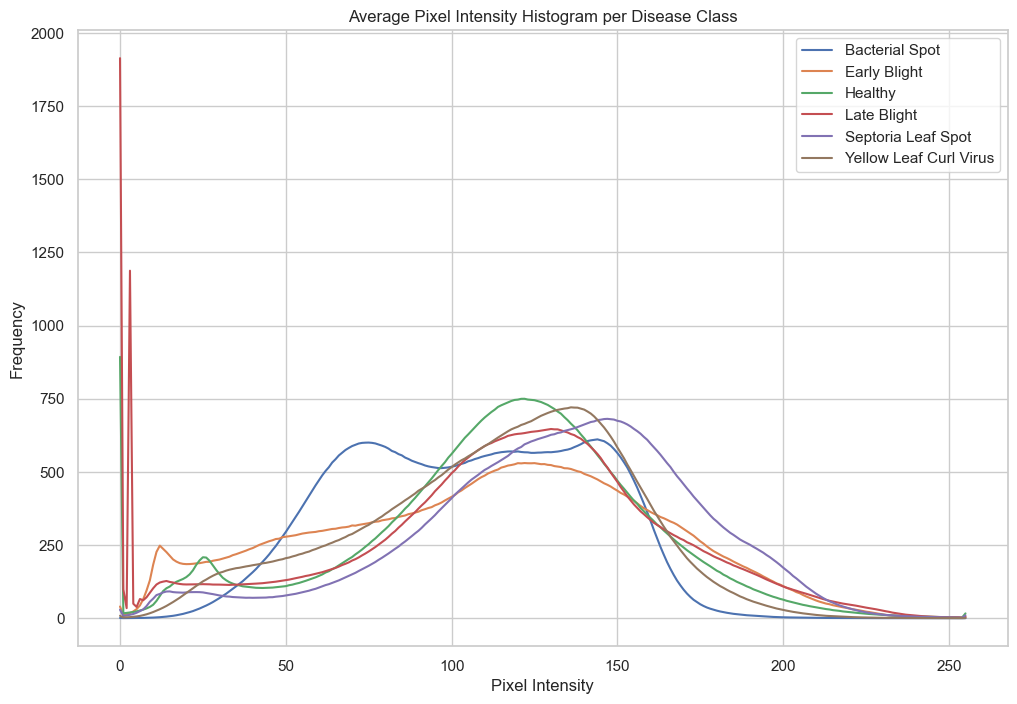

In [41]:
plot_intensity_histograms(training_folder)

### Interpretation
A sharp peak for healthy images at 220 to 250 suggests that there might be more number of pixels with high intensity (given previously how we saw that the brightness for healthy leaves was more).
A sharp peak for 0-10 pixel intensity for late blight suggest that there might be more number of pixels with low intensity (previously we have seen late blight having more outliers in the lower end for the brightness)

It shows that the intensity histogram will not be enough to distinguish between the various classes, because we see there is an overlapp of the histogram lines especially in the range of 50 to 200. It would take color, texture and spatial patterns or more complex methods to identify the disttinction between the diseases.